<a href="https://colab.research.google.com/github/mahin-arvind/GTD-EDA/blob/main/Copy_of_Global_Terrorism_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

In [1]:
import pandas as pd
import numpy as np


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
filepath = '/content/drive/MyDrive/AlmaBetter/EDA CAPSTONE/Global Terrorism Data.csv'
gta_df = pd.read_csv(filepath, encoding = "ISO-8859-1", engine='python')

In [4]:
gta_df.head(5)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [5]:
gta_df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

Picking columns relevant for the EDA

Reference Material to pick columns [GTA CodeBook](https://www.start.umd.edu/gtd/downloads/Codebook.pdf)

In [6]:
useful_columns = ['eventid','iyear','country_txt', 'region_txt','city','crit1','crit2','crit3','attacktype1','attacktype1_txt',
                  'success','suicide','weaptype1','weaptype1_txt','targtype1','targtype1_txt', 'gname','claimed','nkill',
                  ]


In [7]:
gta_df = gta_df.loc[:, useful_columns]

In [8]:
gta_df.head(5)

,eventid,iyear,country_txt,region_txt,city,crit1,crit2,crit3,attacktype1,attacktype1_txt,success,suicide,weaptype1,weaptype1_txt,targtype1,targtype1_txt,gname,claimed,nkill
0,197000000001,1970,Dominican Republic,Central America & Caribbean,Santo Domingo,1,1,1,1,Assassination,1,0,13,Unknown,14,Private Citizens & Property,MANO-D,NaN,1.0
1,197000000002,1970,Mexico,North America,Mexico city,1,1,1,6,Hostage Taking (Kidnapping),1,0,13,Unknown,7,Government (Diplomatic),23rd of September Communist League,NaN,0.0
2,197001000001,1970,Philippines,Southeast Asia,Unknown,1,1,1,1,Assassination,1,0,13,Unknown,10,Journalists & Media,Unknown,NaN,1.0
3,197001000002,1970,Greece,Western Europe,Athens,1,1,1,3,Bombing/Explosion,1,0,6,Explosives,7,Government (Diplomatic),Unknown,NaN,NaN
4,197001000003,1970,Japan,East Asia,Fukouka,1,1,1,7,Facility/Infrastructure Attack,1,0,8,Incendiary,7,Government (Diplomatic),Unknown,NaN,NaN


In [9]:
gta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   eventid          181691 non-null  int64  
 1   iyear            181691 non-null  int64  
 2   country_txt      181691 non-null  object 
 3   region_txt       181691 non-null  object 
 4   city             181257 non-null  object 
 5   crit1            181691 non-null  int64  
 6   crit2            181691 non-null  int64  
 7   crit3            181691 non-null  int64  
 8   attacktype1      181691 non-null  int64  
 9   attacktype1_txt  181691 non-null  object 
 10  success          181691 non-null  int64  
 11  suicide          181691 non-null  int64  
 12  weaptype1        181691 non-null  int64  
 13  weaptype1_txt    181691 non-null  object 
 14  targtype1        181691 non-null  int64  
 15  targtype1_txt    181691 non-null  object 
 16  gname            181691 non-null  obje

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [11]:
corrdf = gta_df.corr()

In [12]:
corrdf

,eventid,iyear,crit1,crit2,crit3,attacktype1,success,suicide,weaptype1,targtype1,claimed,nkill
eventid,1.000000,0.999996,0.002019,0.026215,-0.016789,0.074173,-0.082972,0.137743,-0.011716,0.079080,0.141600,0.015351
iyear,0.999996,1.000000,0.001995,0.026211,-0.016784,0.074153,-0.082963,0.137736,-0.011737,0.079082,0.141486,0.015341
crit1,0.002019,0.001995,1.000000,-0.008984,-0.040589,0.027544,-0.010733,0.019039,0.029257,-0.040026,0.006403,0.010834
crit2,0.026215,0.026211,-0.008984,1.000000,-0.031425,0.005157,-0.013476,0.002770,-0.008549,-0.101522,0.005675,-0.019506
crit3,-0.016789,-0.016784,-0.040589,-0.031425,1.000000,0.028124,-0.013678,-0.026620,0.018320,0.251296,-0.047356,-0.056952
attacktype1,0.074173,0.074153,0.027544,0.005157,0.028124,1.000000,0.048408,-0.029962,0.658954,0.014513,0.020243,0.002475
success,-0.082972,-0.082963,-0.010733,-0.013476,-0.013678,0.048408,1.000000,-0.031155,-0.008178,-0.059637,-0.005985,0.053115
suicide,0.137743,0.137736,0.019039,0.002770,-0.026620,-0.029962,-0.031155,1.000000,-0.039928,-0.023440,0.035791,0.136086
weaptype1,-0.011716,-0.011737,0.029257,-0.008549,0.018320,0.658954,-0.008178,-0.039928,1.000000,0.019846,0.019681,0.004038
targtype1,0.079080,0.079082,-0.040026,-0.101522,0.251296,0.014513,-0.059637,-0.023440,0.019846,1.000000,-0.028972,0.008499


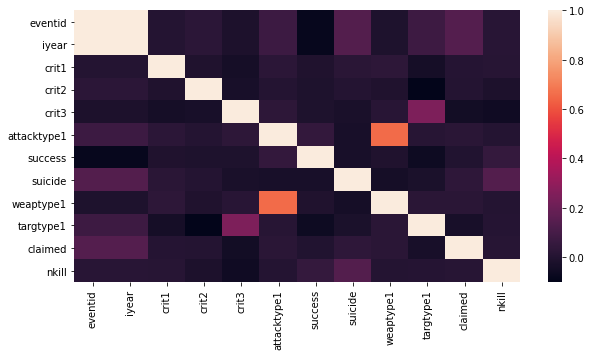

In [13]:
plt.figure(figsize=(10,5))
sns.heatmap(corrdf)

Notable correlation observed with
weapon and type of attack

Mild correlation observed with target type1 and crit3 ( criteria: OUTSIDE INTERNATIONAL HUMANITARIAN LAW)

In [14]:
gta_df.columns

Index(['eventid', 'iyear', 'country_txt', 'region_txt', 'city', 'crit1',
       'crit2', 'crit3', 'attacktype1', 'attacktype1_txt', 'success',
       'suicide', 'weaptype1', 'weaptype1_txt', 'targtype1', 'targtype1_txt',
       'gname', 'claimed', 'nkill'],
      dtype='object')

## Analysis by Type of Attack and Fatalities

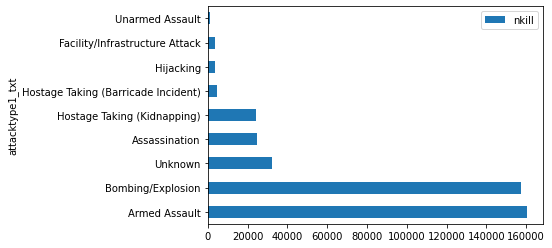

In [15]:
atk = gta_df[~gta_df['nkill'].isna()].groupby(['attacktype1_txt']).agg({'nkill':'sum'})
atk.sort_values(['nkill'], ascending = False).plot(kind = 'barh')

Armed Assault, Bombing/Explosion, Armed Assault are the acts of terrorisms with a large number of fatalities

###Armed assault


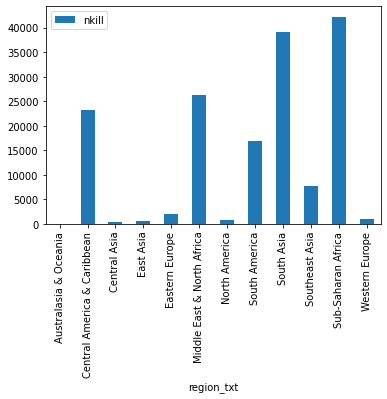

In [16]:
gta_df[gta_df.attacktype1_txt =='Armed Assault'].groupby(['region_txt']).agg({'nkill':'sum'}).plot(kind='bar')

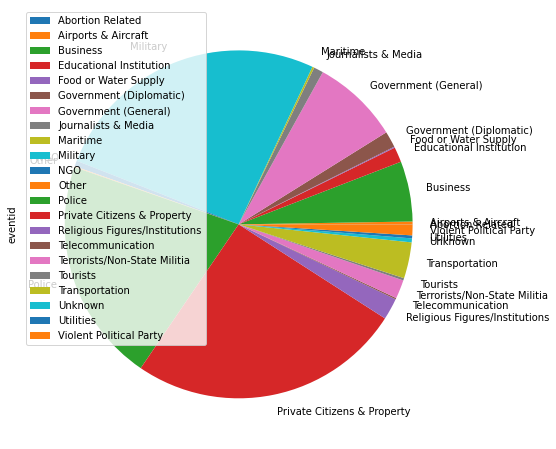

In [50]:
plt.rcParams['figure.figsize'] = (8, 8)
armas = gta_df[gta_df.attacktype1_txt =='Armed Assault'].copy()
armas.groupby(['targtype1_txt']).agg({'eventid':'count'}).plot(x='targtype_txt', y='eventid' ,kind = 'pie')

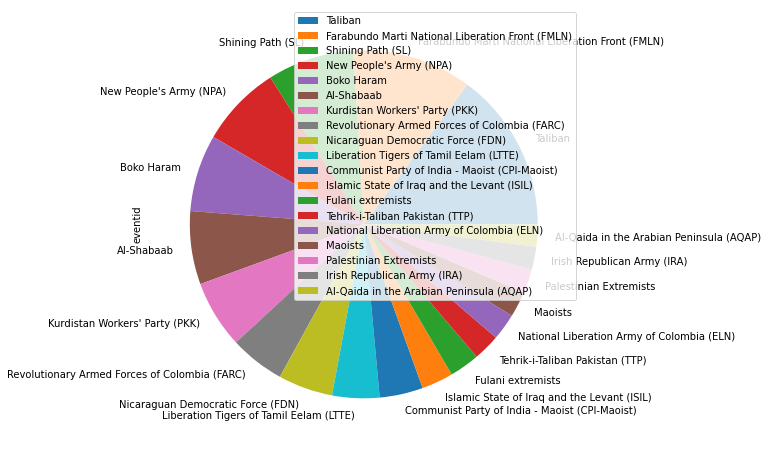

In [80]:
plt.rcParams['figure.figsize'] = (25, 8)
armas = gta_df[(gta_df.attacktype1_txt =='Armed Assault') & (~gta_df.gname.isna()) ].copy()
gangs = armas.groupby(['gname']).agg({'eventid': 'count'})
gangs.sort_values(['eventid'], ascending= False).head(20).iloc[1:,:].plot(x='gname', y='eventid',kind = 'pie')

###Bombing/Explosion

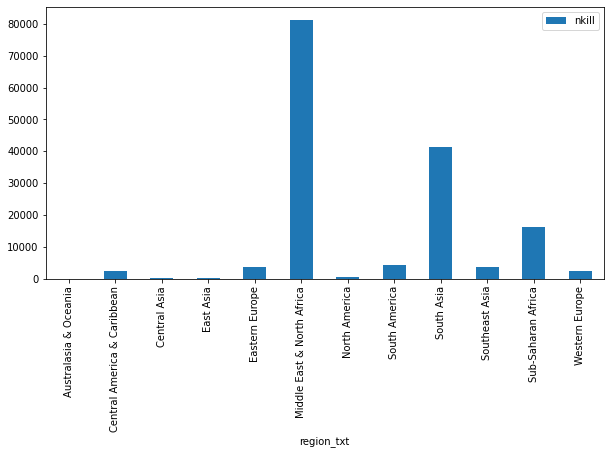

In [18]:
gta_df[gta_df.attacktype1_txt =='Bombing/Explosion'].groupby(['region_txt']).agg({'nkill':'sum'}).plot(kind='bar')

In [81]:
bomb = gta_df[gta_df.attacktype1_txt =='Bombing/Explosion'].copy()
bomb

,eventid,iyear,country_txt,region_txt,city,crit1,crit2,crit3,attacktype1,attacktype1_txt,success,suicide,weaptype1,weaptype1_txt,targtype1,targtype1_txt,gname,claimed,nkill
3,197001000002,1970,Greece,Western Europe,Athens,1,1,1,3,Bombing/Explosion,1,0,6,Explosives,7,Government (Diplomatic),Unknown,NaN,NaN
7,197001020002,1970,United States,North America,Oakland,1,1,1,3,Bombing/Explosion,1,0,6,Explosives,21,Utilities,Unknown,0.0,0.0
10,197001050001,1970,United States,North America,Baraboo,1,1,0,3,Bombing/Explosion,0,0,6,Explosives,4,Military,"Weather Underground, Weathermen",NaN,0.0
15,197001100001,1970,East Germany (GDR),Eastern Europe,Berlin,1,1,1,3,Bombing/Explosion,1,0,6,Explosives,2,Government (General),Commune 1,NaN,NaN
17,197001120001,1970,United States,North America,New York City,1,1,1,3,Bombing/Explosion,1,0,6,Explosives,8,Educational Institution,Black Nationalists,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181681,201712310016,2017,Philippines,Southeast Asia,Shariff Aguak,1,1,1,3,Bombing/Explosion,1,0,6,Explosives,3,Police,Bangsamoro Islamic Freedom Movement (BIFM),0.0,1.0
181685,201712310020,2017,Afghanistan,South Asia,Maymana,1,1,1,3,Bombing/Explosion,1,0,6,Explosives,1,Business,Unknown,0.0,0.0
181687,201712310029,2017,Syria,Middle East & North Africa,Jableh,1,1,0,3,Bombing/Explosion,1,0,6,Explosives,4,Military,Muslim extremists,0.0,2.0
181689,201712310031,2017,India,South Asia,Imphal,1,1,1,3,Bombing/Explosion,0,0,6,Explosives,2,Government (General),Unknown,0.0,0.0


###Assassination

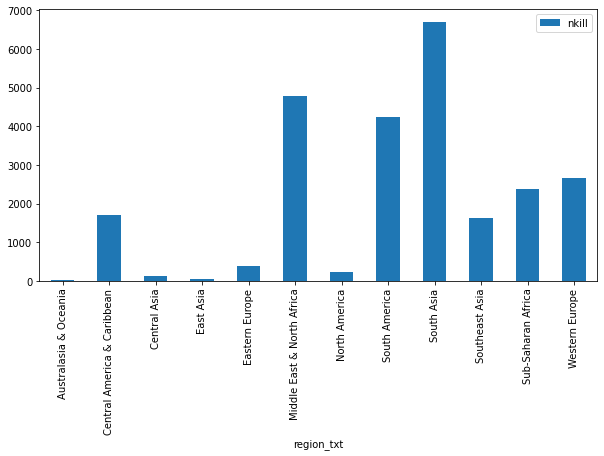

In [19]:
gta_df[gta_df.attacktype1_txt =='Assassination'].groupby(['region_txt']).agg({'nkill':'sum'}).plot(kind='bar')

##Analysis by Region through Time

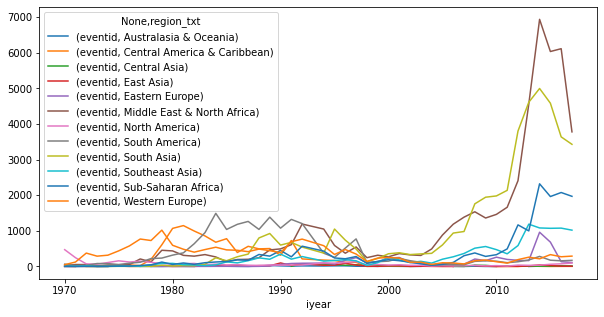

In [20]:
  plt.rcParams['figure.figsize'] = (10, 5)
  time = gta_df.groupby(['iyear','region_txt']).agg({'eventid':'count'})
  time.unstack().plot()

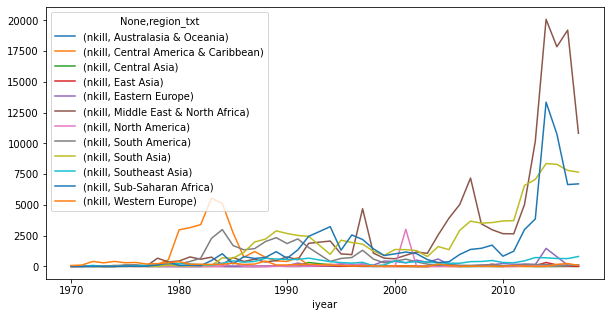

In [21]:
plt.rcParams['figure.figsize'] = (10, 5)
time = gta_df.groupby(['iyear','region_txt']).agg({'nkill':'sum'})
time.unstack().plot()

pink line spike near 2000- september 11 attacks

brown spike is the war tensions refers to the battle of gaza bw Hamas and Fatah. 2009 the gaza war ended explaining the dip

2010 peaks again with Syrian Civil war and Iraqui Civil War